In [1]:
#Library needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#this line will allow to set an option in pandas for it display all the columns of the dataset 
# what ever the number
pd.set_option('display.max_columns', None)

In [2]:
#upload csv file

species = pd.read_csv("C:/Users/marie/Documents/DSTI_Cours/Python_Class/Python_Lab/Exam_project/Project 2/Resources/doi_10_5061_dryad_xpnvx0kmn__v20230901/species.csv", sep=';', index_col='Index')

index= pd.read_csv("C:/Users/marie/Documents/DSTI_Cours/Python_Class/Python_Lab/Exam_project/Project 2/CoralReefFishSpeciesAssessment/Data/Species_diversity.csv", sep=';')

Merge of the dataset to get the indexes in the species tables

In [75]:
index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   site            3999 non-null   object 
 1   Total           3999 non-null   float64
 2   Nb_dif_Sp       3999 non-null   int64  
 3   Margalef_Index  3999 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 125.1+ KB


In [76]:
species.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 0 to 3998
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   site                         3999 non-null   object 
 1   model                        3999 non-null   object 
 2   Year                         3999 non-null   int64  
 3   Month                        3999 non-null   object 
 4   Latitude                     3999 non-null   float64
 5   Longitude                    3999 non-null   float64
 6   Depth                        3999 non-null   float64
 7   Region                       3999 non-null   object 
 8   Coral_cover                  3292 non-null   float64
 9   Reef_complexity              3292 non-null   float64
 10  SST                          3999 non-null   float64
 11  NPP                          3999 non-null   float64
 12  Wave_exposure                3999 non-null   float64
 13  Habitat_type_classLV0  

In [3]:
#Inner join
species_2 = pd.merge(left=species, right=index, on='site')

In [78]:
species_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   site                         3999 non-null   object 
 1   model                        3999 non-null   object 
 2   Year                         3999 non-null   int64  
 3   Month                        3999 non-null   object 
 4   Latitude                     3999 non-null   float64
 5   Longitude                    3999 non-null   float64
 6   Depth                        3999 non-null   float64
 7   Region                       3999 non-null   object 
 8   Coral_cover                  3292 non-null   float64
 9   Reef_complexity              3292 non-null   float64
 10  SST                          3999 non-null   float64
 11  NPP                          3999 non-null   float64
 12  Wave_exposure                3999 non-null   float64
 13  Habitat_type_class

Based on the exploration I select the following features:
- Numerical: Nursery_seagrass, nursery_mangrove, connectivity, coral_cover, reef_complexity, tourist fishing, marina slip 25km, SG permits 50km, rec reliance, commercial pound landed, artificial reef, pop per aera reef 20km, recreational fishermen 50km, Depth, wave exposure, depth sbrocco, deepwater, SST, Marina slips 10 km, and NPP

- Categorical Region, habibtat type class LV2

- kept the adding index col to get the number of fish per sites, the number of different fish observed per site and the margaleft index showing the fish diversity

The numerical cols contain missing values for coral_cover, reef_complexity, and connectivity by filling them I will use the mean of the values for each features in function of the Habitat_type_classLV2 and region.

In [92]:
species_2.columns

Index(['site', 'model', 'Year', 'Month', 'Latitude', 'Longitude', 'Depth',
       'Region', 'Coral_cover', 'Reef_complexity', 'SST', 'NPP',
       'Wave_exposure', 'Habitat_type_classLV0', 'Habitat_type_classLV2',
       'Coral_area_UFRTM_20km', 'Coral_area_UFRTM_200km', 'Depth_Sbrocco',
       'Deepwater', 'FSA', 'Marina_slips_10km', 'Marina_slips_25km',
       'Marine_reserve', 'Population_20km', 'Population_50km',
       'Recreational_fishermen_50km', 'Tourist_fishing',
       'Artificial_reefs_1km', 'SG_permits_50km', 'SG_charter_permits_25km',
       'Total_gravity_intercept', 'Total_gravity', 'Keys_Divisions', 'FKNMS',
       'DryTortugas', 'BNP', 'CoralECA', 'Nursery_seagrass',
       'Nursery_mangroves', 'connectivity', 'Comm_engagement', 'Comm_reliance',
       'Rec_engagement', 'Rec_reliance', 'Commercial_pounds_landed',
       'Pop_per_area_reef_20km', 'Random', 'impact', 'YEAR', 'HABITAT_CD',
       'REGION', 'PCT_CORAL', 'MAX_HARD_RELIEF', 'no.divers',
       'Diversity_in

In [4]:
#Create a copy of the data set to drop the unuseable columns and fill the missing values

test = species_2.loc[:,['Depth',
       'Region', 'Coral_cover', 'Reef_complexity', 'SST', 'NPP',
       'Wave_exposure','Habitat_type_classLV2', 'Depth_Sbrocco',
       'Deepwater','Marina_slips_10km', 'Tourist_fishing',
       'Artificial_reefs_1km','SG_permits_50km', 'Total_gravity','Nursery_seagrass',
       'Nursery_mangroves', 'connectivity', 'Diversity_index', 'Total', 'Nb_dif_Sp', 'Margalef_Index'
]]

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Depth                  3999 non-null   float64
 1   Region                 3999 non-null   object 
 2   Coral_cover            3292 non-null   float64
 3   Reef_complexity        3292 non-null   float64
 4   SST                    3999 non-null   float64
 5   NPP                    3999 non-null   float64
 6   Wave_exposure          3999 non-null   float64
 7   Habitat_type_classLV2  3999 non-null   object 
 8   Depth_Sbrocco          3999 non-null   float64
 9   Deepwater              3999 non-null   float64
 10  Marina_slips_10km      3999 non-null   int64  
 11  Tourist_fishing        3999 non-null   float64
 12  Artificial_reefs_1km   3999 non-null   int64  
 13  SG_permits_50km        3999 non-null   int64  
 14  Total_gravity          3896 non-null   float64
 15  Nurs

In [6]:
#Fill the missing values by the mean of the values in function of habitat type class lv2
test.groupby(['Habitat_type_classLV2','Region'])['Coral_cover'].median()


Habitat_type_classLV2                Region  
Aggregate Reef                       DRY TORT    4.740157
                                     FLA KEYS    2.994240
                                     SEFCRI      1.752857
Colonized Pavement                   FLA KEYS    2.252332
                                     SEFCRI      1.249485
Individual or Aggregated Patch Reef  DRY TORT    4.717778
                                     FLA KEYS    6.587518
                                     SEFCRI      1.746295
Pavement                             FLA KEYS    2.737093
Pavement with Sand Channels          DRY TORT    2.000000
                                     FLA KEYS    2.514799
Reef Rubble                          FLA KEYS    1.000000
Ridge                                FLA KEYS    2.546567
                                     SEFCRI      1.000000
Spur and Groove                      DRY TORT    5.306240
                                     FLA KEYS    3.274208
                          

In [81]:
test.loc[test.Coral_cover.isna(),['Habitat_type_classLV2','Region']]

,Habitat_type_classLV2,Region
1350,Spur and Groove,SEFCRI
1351,Spur and Groove,SEFCRI
1352,Spur and Groove,SEFCRI
1353,Spur and Groove,SEFCRI
1354,Spur and Groove,SEFCRI
...,...,...
3327,Ridge,SEFCRI
3328,Ridge,SEFCRI
3350,Colonized Pavement,SEFCRI
3394,Ridge,SEFCRI


In [7]:
coral_median = test.groupby(['Habitat_type_classLV2','Region'])['Coral_cover'].median().astype(int).to_dict()

In [8]:
coral_median.keys()

dict_keys([('Aggregate Reef', 'DRY TORT'), ('Aggregate Reef', 'FLA KEYS'), ('Aggregate Reef', 'SEFCRI'), ('Colonized Pavement', 'FLA KEYS'), ('Colonized Pavement', 'SEFCRI'), ('Individual or Aggregated Patch Reef', 'DRY TORT'), ('Individual or Aggregated Patch Reef', 'FLA KEYS'), ('Individual or Aggregated Patch Reef', 'SEFCRI'), ('Pavement', 'FLA KEYS'), ('Pavement with Sand Channels', 'DRY TORT'), ('Pavement with Sand Channels', 'FLA KEYS'), ('Reef Rubble', 'FLA KEYS'), ('Ridge', 'FLA KEYS'), ('Ridge', 'SEFCRI'), ('Spur and Groove', 'DRY TORT'), ('Spur and Groove', 'FLA KEYS'), ('Spur and Groove', 'SEFCRI')])

In [9]:
coral_median[('Aggregate Reef', 'DRY TORT')]

4

In [10]:
def coral_fill_na(Habitat_Region):
    Habitat_Region = tuple(Habitat_Region)
    val = coral_median[Habitat_Region]
    return val

In [11]:
coral_fill_na(['Aggregate Reef', 'DRY TORT'])

4

In [12]:
for Habitat_type_classLV2,Region in coral_median.keys():
    temp = test.loc[(test.Habitat_type_classLV2 == Habitat_type_classLV2) & (test.Region == Region), :]
    missing_val_index = temp.loc[temp.Coral_cover.isna()].index
    test.loc[missing_val_index, 'Coral_cover'] = coral_fill_na([Habitat_type_classLV2,Region])

The same logic is used for reef complexity and connectivity

In [13]:
#Reef complixity

Reef_median = test.groupby(['Habitat_type_classLV2','Region'])['Reef_complexity'].median().astype(int).to_dict()

def reef_fill_na(Habitat_Region):
    Habitat_Region = tuple(Habitat_Region)
    val_reef = Reef_median[Habitat_Region]
    return val_reef

for Habitat_type_classLV2,Region in Reef_median.keys():
    temp = test.loc[(test.Habitat_type_classLV2 == Habitat_type_classLV2) & (test.Region == Region), :]
    missing_val_index = temp.loc[temp.Reef_complexity.isna()].index
    test.loc[missing_val_index, 'Reef_complexity'] = reef_fill_na([Habitat_type_classLV2,Region])


In [14]:
#Connectivity

conn_median = test.groupby(['Habitat_type_classLV2','Region'])['connectivity'].median().astype(int).to_dict()

def conn_fill_na(Habitat_Region):
    Habitat_Region = tuple(Habitat_Region)
    val_conn = Reef_median[Habitat_Region]
    return val_conn

for Habitat_type_classLV2,Region in conn_median.keys():
    temp = test.loc[(test.Habitat_type_classLV2 == Habitat_type_classLV2) & (test.Region == Region), :]
    missing_val_index = temp.loc[temp.connectivity.isna()].index
    test.loc[missing_val_index, 'connectivity'] = reef_fill_na([Habitat_type_classLV2,Region])

In [15]:
#Total_gravity

grav_median = test.groupby(['Habitat_type_classLV2','Region'])['Total_gravity'].median().astype(int).to_dict()

def grav_fill_na(Habitat_Region):
    Habitat_Region = tuple(Habitat_Region)
    val_grav = Reef_median[Habitat_Region]
    return val_grav

for Habitat_type_classLV2,Region in grav_median.keys():
    temp = test.loc[(test.Habitat_type_classLV2 == Habitat_type_classLV2) & (test.Region == Region), :]
    missing_val_index = temp.loc[temp.Total_gravity.isna()].index
    test.loc[missing_val_index, 'Total_gravity'] = grav_fill_na([Habitat_type_classLV2,Region])

In [106]:
#Correlation between those features

test_num = test.select_dtypes(include=np.number) 

px.imshow(test_num.corr())

The Categorical features are converting by one_hot_encoding

In [120]:
#Isolation of the categorical columns
test_cat = test.select_dtypes(exclude=np.number)

In [121]:
test_cat_dumm = pd.get_dummies(test_cat, dtype=float)

In [109]:
test_cat_dumm

,Region_DRY TORT,Region_FLA KEYS,Region_SEFCRI,Habitat_type_classLV2_Aggregate Reef,Habitat_type_classLV2_Colonized Pavement,Habitat_type_classLV2_Individual or Aggregated Patch Reef,Habitat_type_classLV2_Pavement,Habitat_type_classLV2_Pavement with Sand Channels,Habitat_type_classLV2_Reef Rubble,Habitat_type_classLV2_Ridge,Habitat_type_classLV2_Spur and Groove
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3995,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3996,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3997,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
#concat of dummies variables with the main dataset

test2 = pd.concat([test,test_cat_dumm], axis=1)

In [123]:
test_proceed = test2.drop(test_cat, axis=1)

In [124]:
px.imshow(test_proceed.corr())

This dataframe will be save for ML training

In [125]:
test_proceed.to_csv('species_ML_2.csv', index=False)

The borruta analysis by R confirmed the features selected are good to predict the diversity index.

In [3]:
#Load the dataset for the ML part
df= pd.read_csv("C:/Users/marie/Documents/DSTI_Cours/Python_Class/Python_Lab/Exam_project/Project 2/CoralReefFishSpeciesAssessment/species_ML_2.csv")

In [5]:
df.columns

Index(['Depth', 'Coral_cover', 'Reef_complexity', 'SST', 'NPP',
       'Wave_exposure', 'Depth_Sbrocco', 'Deepwater', 'Marina_slips_10km',
       'Tourist_fishing', 'Artificial_reefs_1km', 'SG_permits_50km',
       'Total_gravity', 'Nursery_seagrass', 'Nursery_mangroves',
       'connectivity', 'Diversity_index', 'Total', 'Nb_dif_Sp',
       'Margalef_Index', 'Region_DRY TORT', 'Region_FLA KEYS', 'Region_SEFCRI',
       'Habitat_type_classLV2_Aggregate Reef',
       'Habitat_type_classLV2_Colonized Pavement',
       'Habitat_type_classLV2_Individual or Aggregated Patch Reef',
       'Habitat_type_classLV2_Pavement',
       'Habitat_type_classLV2_Pavement with Sand Channels',
       'Habitat_type_classLV2_Reef Rubble', 'Habitat_type_classLV2_Ridge',
       'Habitat_type_classLV2_Spur and Groove'],
      dtype='object')

In [4]:
df_ordered = df.loc[:,['Depth', 'Coral_cover', 'Reef_complexity', 'SST', 'NPP',
       'Wave_exposure', 'Depth_Sbrocco', 'Deepwater', 'Marina_slips_10km',
       'Tourist_fishing', 'Artificial_reefs_1km', 'SG_permits_50km',
       'Total_gravity', 'Nursery_seagrass', 'Nursery_mangroves',
       'connectivity', 'Total', 'Nb_dif_Sp',
       'Margalef_Index', 'Region_DRY TORT', 'Region_FLA KEYS', 'Region_SEFCRI',
       'Habitat_type_classLV2_Aggregate Reef',
       'Habitat_type_classLV2_Colonized Pavement',
       'Habitat_type_classLV2_Individual or Aggregated Patch Reef',
       'Habitat_type_classLV2_Pavement',
       'Habitat_type_classLV2_Pavement with Sand Channels',
       'Habitat_type_classLV2_Reef Rubble', 'Habitat_type_classLV2_Ridge',
       'Habitat_type_classLV2_Spur and Groove', 'Diversity_index']]

In [7]:
df_ordered

,Depth,Coral_cover,Reef_complexity,SST,NPP,Wave_exposure,Depth_Sbrocco,Deepwater,Marina_slips_10km,Tourist_fishing,Artificial_reefs_1km,SG_permits_50km,Total_gravity,Nursery_seagrass,Nursery_mangroves,connectivity,Total,Nb_dif_Sp,Margalef_Index,Region_DRY TORT,Region_FLA KEYS,Region_SEFCRI,Habitat_type_classLV2_Aggregate Reef,Habitat_type_classLV2_Colonized Pavement,Habitat_type_classLV2_Individual or Aggregated Patch Reef,Habitat_type_classLV2_Pavement,Habitat_type_classLV2_Pavement with Sand Channels,Habitat_type_classLV2_Reef Rubble,Habitat_type_classLV2_Ridge,Habitat_type_classLV2_Spur and Groove,Diversity_index
0,9.800000,2.000000,0.550322,23.595392,550.865051,6.992729,-10.0,1182.842773,0,1.649034,0,54,69.0,6.483631e+06,199409.31250,4.618931,964.0,32,144.97,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.877755
1,8.821212,6.181818,1.886364,23.578271,577.431946,6.950751,-6.0,1048.528198,0,1.675894,0,70,74.0,1.150137e+07,21234.26563,9.984375,620.0,38,93.19,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.912085
2,17.399239,7.506345,0.749873,23.551355,595.320252,6.950181,-7.0,1441.421387,0,1.676708,0,70,126.0,1.210275e+07,13956.82617,9.984375,1068.0,26,160.63,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.882112
3,9.200000,10.000000,0.400000,23.556451,590.443543,6.959807,-7.0,1341.421387,0,1.696853,0,70,126.0,1.100320e+07,14876.60742,9.984375,528.0,19,79.34,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.806049
4,8.558032,2.870486,0.289415,23.567590,579.874023,6.914992,-14.0,900.000000,16,1.697870,0,70,126.0,9.313051e+06,14697.00195,9.984375,740.0,29,111.25,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.829156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,17.953469,1.000000,0.834130,24.261774,453.504700,7.363275,-27.0,200.000000,935,54.825044,0,53,1137.0,3.750273e+06,353222.28130,23.764472,257.0,26,38.54,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.829341
3995,7.148084,1.246807,0.498723,23.749170,583.637329,7.319593,-7.0,1900.000000,23,1.779467,0,91,110.0,1.641656e+07,489712.90630,28.308633,218.0,27,32.67,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.831818
3996,2.455478,1.795652,0.535043,24.121240,553.635559,7.216960,-17.0,600.000000,0,43.641268,0,48,559.0,3.953954e+07,18971.01172,40.843137,755.0,27,113.51,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.824709
3997,8.145070,1.000000,0.601972,24.224939,386.825714,7.371410,-6.0,1300.000000,1038,57.419664,0,53,17036.0,4.721569e+04,77573.35156,21.638298,208.0,16,31.16,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.857023


In [46]:
#Split the dataset into train and test sets

X = df_ordered.iloc[:, :30].values
y = df_ordered.iloc[:, 30].values

In [48]:
#ensure no value are NaN in X by replacing NaN with 0
X[np.isnan(X)] = 0

In [49]:
#split the dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [43]:
#The data are scale
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Test of the simplest model linear regression

In [36]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [37]:
y_pred_lr = lr_model.predict(X_test)

In [38]:
# Evaluating the model
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, root_mean_squared_error

# Evaluating the model
mae_LR = mean_absolute_error(y_test, y_pred_lr)
mse_LR = mean_squared_error(y_test, y_pred_lr)
r_squared_LR = r2_score(y_test,y_pred_lr)
rmse_LR = np.sqrt(mse_LR)

# Print the evaluation metrics
print('Mean Absolute Error (MAE):', mae_LR)
print('Mean Squared Error (MSE):', mse_LR)
print('R-squared (R²):', r_squared_LR)
print('Root Mean Squared Error (RMSE):', rmse_LR)

Mean Absolute Error (MAE): 84588577779.19083
Mean Squared Error (MSE): 1.5399934205868454e+22
R-squared (R²): -1.4080690998802322e+24
Root Mean Squared Error (RMSE): 124096471367.51494


Test the random forest regressor model

In [39]:
from sklearn.ensemble import RandomForestRegressor

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=100, random_state=0, oob_score=True)

# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=0)

In [40]:
# Making predictions on the same data or new data
predictions = regressor.predict(X_test)

In [41]:
#evaluate the model

# Evaluating the model
mae_RF = mean_absolute_error(y_test, predictions)
mse_RF = mean_squared_error(y_test, predictions)
r_squared_RF = r2_score(y_test,predictions)
rmse_RF = np.sqrt(mse_RF)

# Print the evaluation metrics
print('Metrics for the LR model')
print('Mean Absolute Error (MAE):', mae_LR)
print('Mean Squared Error (MSE):', mse_LR)
print('R-squared (R²):', r_squared_LR)
print('Root Mean Squared Error (RMSE):', rmse_LR)
print()
# Print the evaluation metrics
print('Metrics for the RF model')
print('Mean Absolute Error (MAE):', mae_RF)
print('Mean Squared Error (MSE):', mse_RF)
print('R-squared (R²):', r_squared_RF)
print('Root Mean Squared Error (RMSE):', rmse_RF)

Metrics for the LR model
Mean Absolute Error (MAE): 84588577779.19083
Mean Squared Error (MSE): 1.5399934205868454e+22
R-squared (R²): -1.4080690998802322e+24
Root Mean Squared Error (RMSE): 124096471367.51494

Metrics for the RF model
Mean Absolute Error (MAE): 0.05679872927642709
Mean Squared Error (MSE): 0.0072482520032944005
R-squared (R²): 0.3372673196165591
Root Mean Squared Error (RMSE): 0.08513666662075983


Test of Ridge algorithme with cross validation

In [45]:
from sklearn.linear_model import RidgeCV

ridgeCV= RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1], cv=5)
ridgeCV.fit(X_train, y_train)

RidgeCV(alphas=[0.001, 0.01, 0.1, 1], cv=5)

In [46]:
y_pred_RCV = ridgeCV.predict(X_test)

In [48]:
# Evaluating the model
mae_RCV = mean_absolute_error(y_test, y_pred_RCV)
mse_RCV = mean_squared_error(y_test, y_pred_RCV)
r_squared_RCV = r2_score(y_test,y_pred_RCV)
rmse_RCV = np.sqrt(mse_RCV)

# Print the evaluation metrics
print('Metrics for the Ridge CV model')
print('Mean Absolute Error (MAE):', mae_RCV)
print('Mean Squared Error (MSE):', mse_RCV)
print('R-squared (R²):', r_squared_RCV)
print('Root Mean Squared Error (RMSE):', rmse_RCV)

Metrics for the Ridge CV model
Mean Absolute Error (MAE): 0.0577886397024025
Mean Squared Error (MSE): 0.007550433327624315
R-squared (R²): 0.3096378388887975
Root Mean Squared Error (RMSE): 0.08689322946941444


Try gradient descent algorithms

In [54]:
#split the dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [50]:
#scale the X datasets, mandatory for this type of algorithms

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

stochastic gradient descent with default parameters

In [51]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=8)

sgd_reg.fit(X_train, y_train)

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=8, tol=1e-05)

In [52]:
y_pred_sgd = sgd_reg.predict(X_test)

In [53]:
# Evaluating the model
mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r_squared_sgd = r2_score(y_test,y_pred_sgd)
rmse_sgd = np.sqrt(mse_sgd)

# Print the evaluation metrics
print('Metrics for the Ridge CV model')
print('Mean Absolute Error (MAE):', mae_RCV)
print('Mean Squared Error (MSE):', mse_RCV)
print('R-squared (R²):', r_squared_RCV)
print('Root Mean Squared Error (RMSE):', rmse_RCV)
print()
# Print the evaluation metrics
print('Metrics for the Stochastic gradient descent model')
print('Mean Absolute Error (MAE):', mae_sgd)
print('Mean Squared Error (MSE):', mse_sgd)
print('R-squared (R²):', r_squared_sgd)
print('Root Mean Squared Error (RMSE):', rmse_sgd)

Metrics for the Ridge CV model
Mean Absolute Error (MAE): 0.0577886397024025
Mean Squared Error (MSE): 0.007550433327624315
R-squared (R²): 0.3096378388887975
Root Mean Squared Error (RMSE): 0.08689322946941444

Metrics for the Stochastic gradient descent model
Mean Absolute Error (MAE): 0.05784692159835524
Mean Squared Error (MSE): 0.0075750275596847836
R-squared (R²): 0.30738910342430226
Root Mean Squared Error (RMSE): 0.08703463425375431


Test of polynomial Regression because the linear model are not adapt to the diversity_index values. To test it, addition of the square of each feature in the training set as a new feature

In [55]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly= poly_features.fit_transform(X_train)

In [56]:
X

array([[ 9.8       ,  2.        ,  0.55032175, ...,  0.        ,
         0.        ,  0.        ],
       [ 8.82121212,  6.18181818,  1.88636364, ...,  0.        ,
         0.        ,  1.        ],
       [17.39923858,  7.50634518,  0.7498731 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 2.45547826,  1.79565217,  0.53504348, ...,  0.        ,
         0.        ,  0.        ],
       [ 8.14507042,  1.        ,  0.60197183, ...,  0.        ,
         0.        ,  0.        ],
       [14.34458834,  1.        ,  0.55120259, ...,  0.        ,
         0.        ,  0.        ]])

In [57]:
X_poly

array([[29.8       ,  1.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 8.54451962,  2.25304466,  1.12347767, ...,  0.        ,
         0.        ,  1.        ],
       [21.2       ,  7.5       ,  1.65      , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [20.73846154,  4.94871795,  1.73333333, ...,  0.        ,
         0.        ,  0.        ],
       [11.8455243 ,  4.76598465,  1.59680307, ...,  0.        ,
         0.        ,  0.        ],
       [ 3.49891892,  1.        ,  0.25      , ...,  0.        ,
         0.        ,  0.        ]])

In [58]:
lin_reg_pol = LinearRegression()
lin_reg_pol.fit(X_poly, y_train)

LinearRegression()

In [61]:
lin_reg_pol.intercept_, lin_reg_pol.coef_, lr_model.intercept_, lr_model.coef_

(2.0637015629749698,
 array([ 8.35445902e-04,  1.27720962e-04, -4.16401566e-05, -2.78281690e-05,
        -3.11354628e-04, -9.75093911e-05, -8.13689796e-05, -3.10461848e-04,
         2.09054113e-03,  1.85422095e-04,  1.57279225e-05,  5.62442553e-05,
        -6.39354969e-04, -4.73879765e-09,  7.78990450e-07,  1.29631847e-04,
        -6.80102391e-04,  9.87431318e-05, -9.53726140e-05,  7.49332144e-06,
        -8.43946457e-05,  7.69013715e-05, -7.37990830e-06,  8.41099075e-05,
        -7.57391799e-05,  4.13239082e-05,  5.86783480e-05,  3.53603849e-05,
        -5.69075570e-05, -7.94460465e-05, -7.55493724e-05, -2.21569976e-04,
        -6.96416785e-04, -4.44337078e-05, -3.53758025e-06,  7.13399611e-04,
        -7.20328090e-05, -1.12916286e-06, -7.41038629e-06, -2.37456926e-05,
        -3.43659992e-04, -1.26756593e-04,  2.65855423e-07,  6.61187245e-11,
        -1.54666128e-09,  9.53646615e-05, -2.08242738e-05,  1.74255049e-04,
         1.25361428e-04, -5.83190261e-04, -4.14821200e-03,  4.77851

Try to do a learning curve to see which is the better between linear and polynomial for our data. First a linear model then a polynomial model.

In [63]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X_train, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error"
)
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

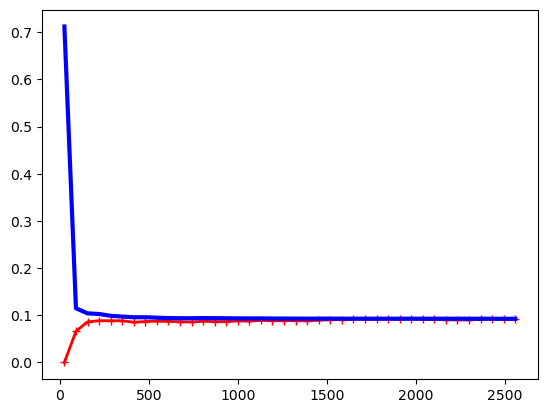

In [65]:
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.show()

In [69]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)

train_sizes2, train_scores2, valid_scores2 = learning_curve(
    polynomial_regression, X_train, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error"
)

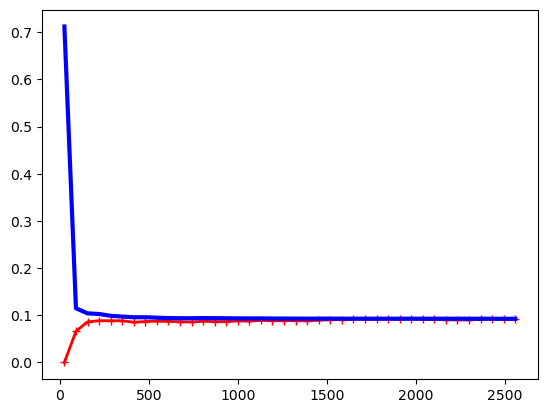

In [70]:
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.show()

This shows that, We have an overfitting with the data where the RMSE (in the y axis) is low but the train (in red) and the valid (in blue) are overlap early in the training under 100 iteration or Epoch (x-axis). These types of models are not adapt to our data for predicting the diversity_index. Try ensemble method gradient boosting to see if we can by_pass the overfitting. 

In [134]:
#Seems to be the better parameters for this models because it reach the R² at 0.34 the better for the moment compared to the others models
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=5, n_estimators=130, n_iter_no_change=10,
                                 learning_rate=0.5, random_state=19)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.5, max_depth=5, n_estimators=130,
                          n_iter_no_change=10, random_state=19)

In [135]:
gbrt.n_estimators_

12

In [136]:
y_pred_gbrt = gbrt.predict(X_test)

In [137]:
# Evaluating the model
mae_gbrt = mean_absolute_error(y_test, y_pred_gbrt)
mse_gbrt = mean_squared_error(y_test, y_pred_gbrt)
r_squared_gbrt = r2_score(y_test,y_pred_gbrt)
rmse_gbrt = np.sqrt(mse_gbrt)

# Print the evaluation metrics
print('Metrics for the Ridge CV model')
print('Mean Absolute Error (MAE):', mae_RCV)
print('Mean Squared Error (MSE):', mse_RCV)
print('R-squared (R²):', r_squared_RCV)
print('Root Mean Squared Error (RMSE):', rmse_RCV)
print()
# Print the evaluation metrics
print('Metrics for the Stochastic gradient descent model')
print('Mean Absolute Error (MAE):', mae_sgd)
print('Mean Squared Error (MSE):', mse_sgd)
print('R-squared (R²):', r_squared_sgd)
print('Root Mean Squared Error (RMSE):', rmse_sgd)
print()
# Print the evaluation metrics
print('Metrics for the gradeitn boosting regressor model')
print('Mean Absolute Error (MAE):', mae_gbrt)
print('Mean Squared Error (MSE):', mse_gbrt)
print('R-squared (R²):', r_squared_gbrt)
print('Root Mean Squared Error (RMSE):', rmse_gbrt)

Metrics for the Ridge CV model
Mean Absolute Error (MAE): 0.0577886397024025
Mean Squared Error (MSE): 0.007550433327624315
R-squared (R²): 0.3096378388887975
Root Mean Squared Error (RMSE): 0.08689322946941444

Metrics for the Stochastic gradient descent model
Mean Absolute Error (MAE): 0.05784692159835524
Mean Squared Error (MSE): 0.0075750275596847836
R-squared (R²): 0.30738910342430226
Root Mean Squared Error (RMSE): 0.08703463425375431

Metrics for the gradeitn boosting regressor model
Mean Absolute Error (MAE): 0.05522258331396033
Mean Squared Error (MSE): 0.00719984006293976
R-squared (R²): 0.341693790299313
Root Mean Squared Error (RMSE): 0.08485187129898644


Try a stacking model to see if used logistic regression and random forest together can improve the learning and avoid overfitting if still not work try with changing the target scale (log10? bucket_sizes?)

In [6]:
df_ordered.skew()

Depth                                                        0.607977
Coral_cover                                                  3.688550
Reef_complexity                                              2.154000
SST                                                         -1.149358
NPP                                                          0.839558
Wave_exposure                                               -3.099313
Depth_Sbrocco                                               -1.026797
Deepwater                                                    1.962738
Marina_slips_10km                                            1.669053
Tourist_fishing                                              1.106022
Artificial_reefs_1km                                         6.148546
SG_permits_50km                                             -0.056372
Total_gravity                                                4.133831
Nursery_seagrass                                             0.928808
Nursery_mangroves   

We observed the many features has a positive skew meaning they has an heavy tail at the rigth of the mean. At the inverse the Target shows an heavy tail at the left (negative skew). It should helping the model performance by transforming/normlized the data with bucket-size for the feature and the log for the target. 
The transformation will do in first on the train set to evaluate the model performance on the train sets with this transformation.

In [7]:
#Split the dataset into train and test sets

X = df_ordered.iloc[:, :30].values
y = df_ordered.iloc[:, 30].values

In [8]:
#Split in train and test sets
#split the dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [9]:
#encodage by bucket sizing the train set
from sklearn.preprocessing import KBinsDiscretizer
enc = KBinsDiscretizer(n_bins= 10, encode="onehot", strategy="uniform", random_state=19)

In [19]:
X_binned = enc.fit_transform(X_train)
X_test_binned = enc.fit_transform(X_test)

c:\Users\marie\anaconda3\envs\ML_Class_Project\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning:

In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.

c:\Users\marie\anaconda3\envs\ML_Class_Project\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning:

In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.



In [14]:
#predict with original data by linear regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(X_train, y_train)

In [15]:
y_pred_ori_lin = lin_reg.predict(X_test)

In [16]:
# Evaluating the model
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, root_mean_squared_error

# Evaluating the model
mae_lin_reg = mean_absolute_error(y_test, y_pred_ori_lin)
mse_lin_reg = mean_squared_error(y_test, y_pred_ori_lin)
r_squared_lin_reg = r2_score(y_test,y_pred_ori_lin)
rmse_lin_reg = np.sqrt(mse_lin_reg)

# Print the evaluation metrics
print('Mean Absolute Error (MAE):', mae_lin_reg)
print('Mean Squared Error (MSE):', mse_lin_reg)
print('R-squared (R²):', r_squared_lin_reg)
print('Root Mean Squared Error (RMSE):', rmse_lin_reg)

Mean Absolute Error (MAE): 0.05776254665749705
Mean Squared Error (MSE): 0.007600288013130361
R-squared (R²): 0.30507945304072304
Root Mean Squared Error (RMSE): 0.08717963072375542


In [20]:
#predict with the binarized X
lin_reg_bin = LinearRegression().fit(X_binned, y_train)

In [21]:
y_pred_bin_lin = lin_reg_bin.predict(X_test_binned)

In [22]:
# Evaluating the model
mae_lin_reg_bin = mean_absolute_error(y_test, y_pred_bin_lin)
mse_lin_reg_bin = mean_squared_error(y_test, y_pred_bin_lin)
r_squared_lin_reg_bin = r2_score(y_test,y_pred_bin_lin)
rmse_lin_reg_bin = np.sqrt(mse_lin_reg_bin)

# Print the evaluation metrics
print('Evaluation of the original data')
print('Mean Absolute Error (MAE):', mae_lin_reg)
print('Mean Squared Error (MSE):', mse_lin_reg)
print('R-squared (R²):', r_squared_lin_reg)
print('Root Mean Squared Error (RMSE):', rmse_lin_reg)
print()
print('Evaluation of the binned data')
print('Mean Absolute Error (MAE):', mae_lin_reg_bin)
print('Mean Squared Error (MSE):', mse_lin_reg_bin)
print('R-squared (R²):', r_squared_lin_reg_bin)
print('Root Mean Squared Error (RMSE):', rmse_lin_reg_bin)

Evaluation of the original data
Mean Absolute Error (MAE): 0.05776254665749705
Mean Squared Error (MSE): 0.007600288013130361
R-squared (R²): 0.30507945304072304
Root Mean Squared Error (RMSE): 0.08717963072375542

Evaluation of the binned data
Mean Absolute Error (MAE): 0.07293661227805293
Mean Squared Error (MSE): 0.010228744556898062
R-squared (R²): 0.06475060551571643
Root Mean Squared Error (RMSE): 0.1011372560281228


The bucket sizing seems to don't be a good approach. Screen of the different possibility offer by sklearn, the robust scaling, power transformer with Yeo-Johnson method (because some values are negative which Box-Cox method don't support), QuantileTransformer seems to be adapt to our data because it handle the skewed data. 

In [54]:
#RobustScaler try with LinearRegression models
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [55]:
from sklearn.preprocessing import RobustScaler

transformer_rob = RobustScaler().fit(X_train)
transformer_rob

RobustScaler()

In [57]:
X_rob_transfo = transformer_rob.transform(X_train)
X_test_rob = transformer_rob.transform(X_test)

In [58]:
lin_reg_rob = LinearRegression().fit(X_rob_transfo, y_train)

In [60]:
y_predict_rob = lin_reg_rob.predict(X_test_rob)

In [61]:
# Evaluating the model
mae_lin_reg_rob = mean_absolute_error(y_test, y_predict_rob)
mse_lin_reg_rob = mean_squared_error(y_test, y_predict_rob)
r_squared_lin_reg_rob = r2_score(y_test,y_predict_rob)
rmse_lin_reg_rob = np.sqrt(mse_lin_reg_rob)

# Print the evaluation metrics
print('Evaluation of the original data')
print('Mean Absolute Error (MAE):', mae_lin_reg)
print('Mean Squared Error (MSE):', mse_lin_reg)
print('R-squared (R²):', r_squared_lin_reg)
print('Root Mean Squared Error (RMSE):', rmse_lin_reg)
print()
print('Evaluation of the robustScaler data')
print('Mean Absolute Error (MAE):', mae_lin_reg_rob)
print('Mean Squared Error (MSE):', mse_lin_reg_rob)
print('R-squared (R²):', r_squared_lin_reg_rob)
print('Root Mean Squared Error (RMSE):', rmse_lin_reg_rob)

Evaluation of the original data
Mean Absolute Error (MAE): 0.05776254665749705
Mean Squared Error (MSE): 0.007600288013130361
R-squared (R²): 0.30507945304072304
Root Mean Squared Error (RMSE): 0.08717963072375542

Evaluation of the robustScaler data
Mean Absolute Error (MAE): 0.05776254665781055
Mean Squared Error (MSE): 0.007600288013135372
R-squared (R²): 0.30507945304026474
Root Mean Squared Error (RMSE): 0.08717963072378417


In [63]:
#PowerTransformer 
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer().fit(X_train)

X_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

In [64]:
lin_reg_pt = LinearRegression().fit(X_pt, y_train)

In [65]:
y_pred_pt = lin_reg_pt.predict(X_test_pt)

In [66]:
# Evaluating the model
mae_lin_reg_pt = mean_absolute_error(y_test, y_pred_pt)
mse_lin_reg_pt = mean_squared_error(y_test, y_pred_pt)
r_squared_lin_reg_pt = r2_score(y_test,y_pred_pt)
rmse_lin_reg_pt = np.sqrt(mse_lin_reg_pt)

# Print the evaluation metrics
print('Evaluation of the original data')
print('Mean Absolute Error (MAE):', mae_lin_reg)
print('Mean Squared Error (MSE):', mse_lin_reg)
print('R-squared (R²):', r_squared_lin_reg)
print('Root Mean Squared Error (RMSE):', rmse_lin_reg)
print()
print('Evaluation of the robustScaler data')
print('Mean Absolute Error (MAE):', mae_lin_reg_pt)
print('Mean Squared Error (MSE):', mse_lin_reg_pt)
print('R-squared (R²):', r_squared_lin_reg_pt)
print('Root Mean Squared Error (RMSE):', rmse_lin_reg_pt)

Evaluation of the original data
Mean Absolute Error (MAE): 0.05776254665749705
Mean Squared Error (MSE): 0.007600288013130361
R-squared (R²): 0.30507945304072304
Root Mean Squared Error (RMSE): 0.08717963072375542

Evaluation of the robustScaler data
Mean Absolute Error (MAE): 0.06127303924821634
Mean Squared Error (MSE): 0.007916259000573252
R-squared (R²): 0.2761891358530405
Root Mean Squared Error (RMSE): 0.08897336118509434


Back to the original data to try to make a pipeline to transform the data with:
- for numerical column a robust_scaler
- for categorical a OneHotEncode

In [92]:
#look at the order of the variables
test.columns

Index(['Depth', 'Region', 'Coral_cover', 'Reef_complexity', 'SST', 'NPP',
       'Wave_exposure', 'Habitat_type_classLV2', 'Depth_Sbrocco', 'Deepwater',
       'Marina_slips_10km', 'Tourist_fishing', 'Artificial_reefs_1km',
       'SG_permits_50km', 'Total_gravity', 'Nursery_seagrass',
       'Nursery_mangroves', 'connectivity', 'Diversity_index', 'Total',
       'Nb_dif_Sp', 'Margalef_Index'],
      dtype='object')

In [16]:
#Reorder of the variables to get the diversity index at the end
test = test.loc[:,['Depth', 'Region', 'Coral_cover', 'Reef_complexity', 'SST', 'NPP',
       'Wave_exposure', 'Habitat_type_classLV2', 'Depth_Sbrocco', 'Deepwater',
       'Marina_slips_10km', 'Tourist_fishing', 'Artificial_reefs_1km',
       'SG_permits_50km', 'Total_gravity', 'Nursery_seagrass',
       'Nursery_mangroves', 'connectivity', 'Total',
       'Nb_dif_Sp', 'Margalef_Index','Diversity_index']]

In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(test, test_size=0.2, random_state=21)

In [18]:
diversity_predictors = train_set.drop("Diversity_index", axis=1)
diversity_target = train_set["Diversity_index"].copy()

In [115]:
#train to scale the diversity_target
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler

target_scaler_rob = RobustScaler()
scaled_labels_rob = target_scaler_rob.fit_transform(diversity_target.to_frame())

target_scaler_pt = PowerTransformer()
scaled_labels_pt = target_scaler_pt.fit_transform(diversity_target.to_frame())

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_labels = log_transformer.transform(diversity_target)

target_scaler_std = StandardScaler()
scaled_labels_std = target_scaler_std.fit_transform(diversity_target.to_frame())




#test the sale of the target with a linear regression
#model = LinearRegression()
#model.fit(diversity_predictors[['Depth']], scaled_labels)
#some_new_data = diversity_predictors[['Depth']].iloc[:5]

#scaled_predictions = model.predict(some_new_data)
#predictions = target_scaler.inverse_transform(scaled_predictions)


c:\Users\marie\anaconda3\envs\ML_Class_Project\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

divide by zero encountered in log



#Look at the distribution of the target ori and after robust scaling and log transfo

<Axes: xlabel='Diversity_index', ylabel='Count'>

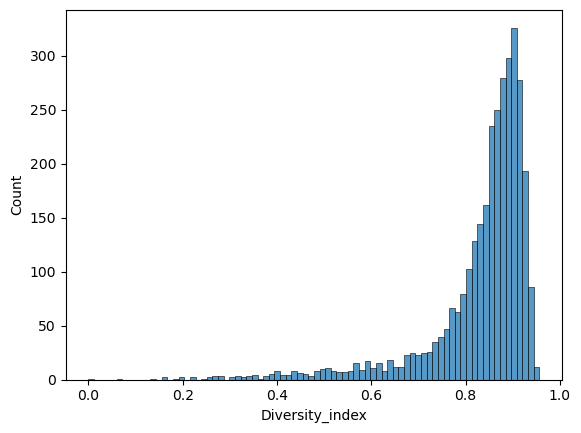

In [26]:
#Original data
sns.histplot(diversity_target)

<Axes: ylabel='Count'>

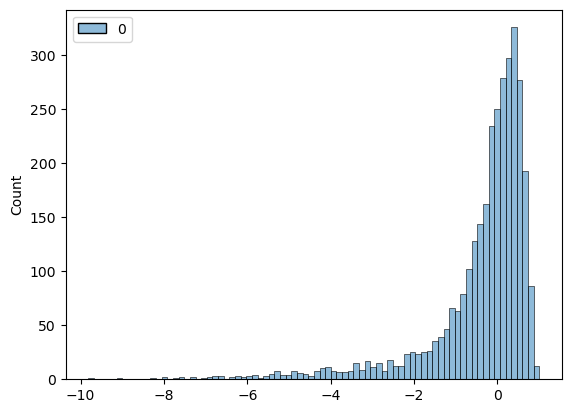

In [29]:
#after robust transform, the distribution look the same as the original
sns.histplot(scaled_labels_rob)

<Axes: ylabel='Count'>

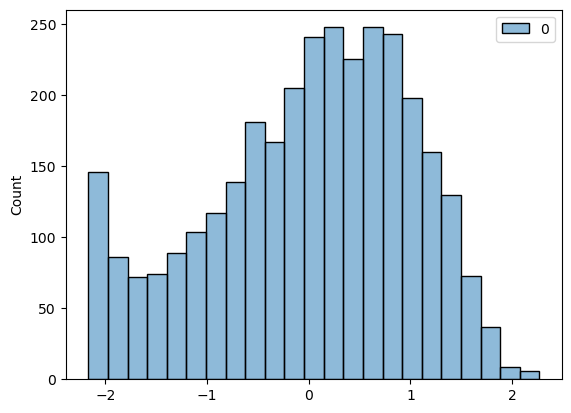

In [30]:
#After PowerTransform
sns.histplot(scaled_labels_pt)

<Axes: xlabel='Diversity_index', ylabel='Count'>

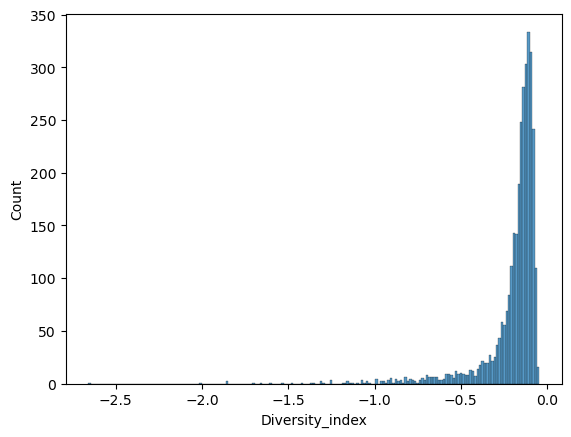

In [32]:
#After log transformation
sns.histplot(log_labels)

<Axes: ylabel='Count'>

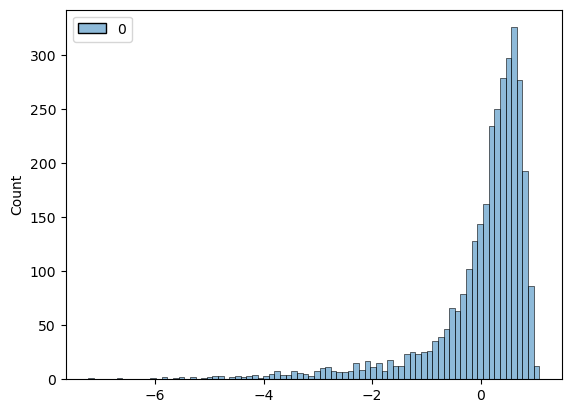

In [116]:
#standard scale
sns.histplot(scaled_labels_std)

Scaling the diversity index by power transform seems to decrease the skew and concentrate the data. Keep this transformation for the models.

In [59]:
#pipeline for the numerical cols
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(
    RobustScaler()
)

In [60]:
#pipeline for the categorical cols
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = make_pipeline(
    OneHotEncoder(handle_unknown="ignore")
)

In [61]:
#Transform the data for the models
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)



In [62]:
diversity_processed = preprocessing.fit_transform(diversity_predictors)
diversity_processed.shape

(3199, 30)

In [37]:
preprocessing.get_feature_names_out()

array(['pipeline-1__Depth', 'pipeline-1__Coral_cover',
       'pipeline-1__Reef_complexity', 'pipeline-1__SST',
       'pipeline-1__NPP', 'pipeline-1__Wave_exposure',
       'pipeline-1__Depth_Sbrocco', 'pipeline-1__Deepwater',
       'pipeline-1__Marina_slips_10km', 'pipeline-1__Tourist_fishing',
       'pipeline-1__Artificial_reefs_1km', 'pipeline-1__SG_permits_50km',
       'pipeline-1__Total_gravity', 'pipeline-1__Nursery_seagrass',
       'pipeline-1__Nursery_mangroves', 'pipeline-1__connectivity',
       'pipeline-1__Total', 'pipeline-1__Nb_dif_Sp',
       'pipeline-1__Margalef_Index', 'pipeline-2__Region_DRY TORT',
       'pipeline-2__Region_FLA KEYS', 'pipeline-2__Region_SEFCRI',
       'pipeline-2__Habitat_type_classLV2_Aggregate Reef',
       'pipeline-2__Habitat_type_classLV2_Colonized Pavement',
       'pipeline-2__Habitat_type_classLV2_Individual or Aggregated Patch Reef',
       'pipeline-2__Habitat_type_classLV2_Pavement',
       'pipeline-2__Habitat_type_classLV2_Paveme

The data are processing, now test a linear regression models

In [63]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(diversity_predictors, diversity_target)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001A857A60DC0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001A857A60E50>)])),
                ('linearregression', LinearRegression())])

In [64]:
predictions = lin_reg.predict(diversity_predictors)

In [65]:
predictions[:5]

array([0.79612741, 0.87490201, 0.81391099, 0.87517771, 0.90687619])

In [66]:
diversity_target.iloc[:5].values

array([0.75143533, 0.90936386, 0.8142197 , 0.83758985, 0.88709915])

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluating the model
mae_train = mean_absolute_error(diversity_target, predictions)
mse_train = mean_squared_error(diversity_target, predictions)
r_squared_train = r2_score(diversity_target, predictions)
rmse_train = np.sqrt(mse_train)

# Print the evaluation metrics

print('Mean Absolute Error (MAE):', mae_train)
print('Mean Squared Error (MSE):', mse_train)
print('R-squared (R²):', r_squared_train)
print('Root Mean Squared Error (RMSE):', rmse_train)

Mean Absolute Error (MAE): 0.05967804246047239
Mean Squared Error (MSE): 0.008042811936820818
R-squared (R²): 0.3926497939339082
Root Mean Squared Error (RMSE): 0.08968172576852443


The linear regression is maybe to restricted for the problem, try with a decision tree

In [68]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor())

tree_reg.fit(diversity_predictors, diversity_target)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001A857A60DC0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001A857A60E50>)])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [69]:
pred_DT = tree_reg.predict(diversity_predictors)

In [70]:
# Evaluating the model
mae_train_DT = mean_absolute_error(diversity_target, pred_DT)
mse_train_DT = mean_squared_error(diversity_target, pred_DT)
r_squared_train_DT = r2_score(diversity_target, pred_DT)
rmse_train_DT = np.sqrt(mse_train_DT)

# Print the evaluation metrics

print('Mean Absolute Error (MAE):', mae_train_DT)
print('Mean Squared Error (MSE):', mse_train_DT)
print('R-squared (R²):', r_squared_train_DT)
print('Root Mean Squared Error (RMSE):', rmse_train_DT)

Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
R-squared (R²): 1.0
Root Mean Squared Error (RMSE): 0.0


In [72]:
from sklearn.model_selection import cross_val_score

tree_rmse = -cross_val_score(tree_reg, diversity_predictors, diversity_target, 
                             scoring="neg_root_mean_squared_error", cv=5)

In [73]:
pd.Series(tree_rmse).describe()

count    5.000000
mean     0.117858
std      0.005425
min      0.112236
25%      0.112550
50%      0.118245
75%      0.122081
max      0.124179
dtype: float64

In [77]:
lin_rmse =  -cross_val_score(lin_reg, diversity_predictors, diversity_target, 
                             scoring="neg_root_mean_squared_error", cv=5)

In [75]:
pd.Series(lin_rmse).describe()

count    5.000000
mean     0.090816
std      0.003785
min      0.085197
25%      0.089607
50%      0.090694
75%      0.094053
max      0.094527
dtype: float64

Try a random forest regressor

In [121]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=19))
forest_rmse =  -cross_val_score(forest_reg, diversity_predictors, diversity_target, 
                             scoring="neg_root_mean_squared_error", 
                             cv=5)

In [82]:
pd.Series(forest_rmse).describe()

count    5.000000
mean    -0.452058
std      0.038440
min     -0.503763
25%     -0.478800
50%     -0.434834
75%     -0.434702
max     -0.408193
dtype: float64

The better seems to be the Linear Regression which get a R² of 0.39 and low RMSE (see cross validation), try to fine tune the model to see if I can improve it.
First grid search to find the better hyperparameter for the model.

In [107]:
from sklearn.linear_model import Ridge

Ridge_reg = make_pipeline(preprocessing,
                           Ridge(alpha=2, solver='auto', random_state=19))
Ridge_rmse =  -cross_val_score(Ridge_reg, diversity_predictors, diversity_target, 
                             scoring="neg_root_mean_squared_error", 
                             cv=5)

In [108]:
pd.Series(Ridge_rmse).describe()

count    5.000000
mean     0.090806
std      0.003780
min      0.085201
25%      0.089601
50%      0.090660
75%      0.094088
max      0.094480
dtype: float64

In [123]:
#try the random_forest on the test set

forest_reg.fit(diversity_predictors, diversity_target)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001A857A60DC0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001A857A60E50>)])),
                ('randomforestregressor', RandomForestRegressor())])

In [124]:
X_test = test_set.drop("Diversity_index", axis=1)
y_test = test_set['Diversity_index'].copy()

In [125]:
final_pred = forest_reg.predict(X_test)

In [126]:
# Evaluating the model
mae_final = mean_absolute_error(y_test, final_pred)
mse_final = mean_squared_error(y_test, final_pred)
r_squared_final = r2_score(y_test, final_pred)
rmse_final = np.sqrt(mse_final)

# Print the evaluation metrics

print('Mean Absolute Error (MAE):', mae_final)
print('Mean Squared Error (MSE):', mse_final)
print('R-squared (R²):', r_squared_final)
print('Root Mean Squared Error (RMSE):', rmse_final)

Mean Absolute Error (MAE): 0.05760590932605002
Mean Squared Error (MSE): 0.007541809086916138
R-squared (R²): 0.41456160379069473
Root Mean Squared Error (RMSE): 0.08684358978598328


Try to fine tune the model and try a gradient boosting model